In [2]:
# Import necessary libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load SQL data
file_path = "QueryResults.csv"  
data = pd.read_csv(file_path)

# Fill missing values for numeric columns with 0 (if applicable)
activity_columns = ['Reputation', 'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'TotalCommentCount']
for col in activity_columns:
    if col in data.columns:
        data[col] = data[col].fillna(0)

# Normalize the features
scaler = MinMaxScaler()
normalized_features = ['Reputation', 'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount', 'TotalCommentCount']
data[normalized_features] = scaler.fit_transform(data[normalized_features])

# Select the features for clustering
X = data[normalized_features].values


In [26]:
# Perform Agglomerative Clustering with Single Linkage
clustering_single = AgglomerativeClustering(n_clusters=4, linkage='single').fit(X)
data['Cluster_Single'] = clustering_single.labels_  # Add Single Linkage cluster labels to the DataFrame

# Perform Agglomerative Clustering with Complete Linkage
clustering_complete = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)
data['Cluster_Complete'] = clustering_complete.labels_  # Add Complete Linkage cluster labels to the DataFrame


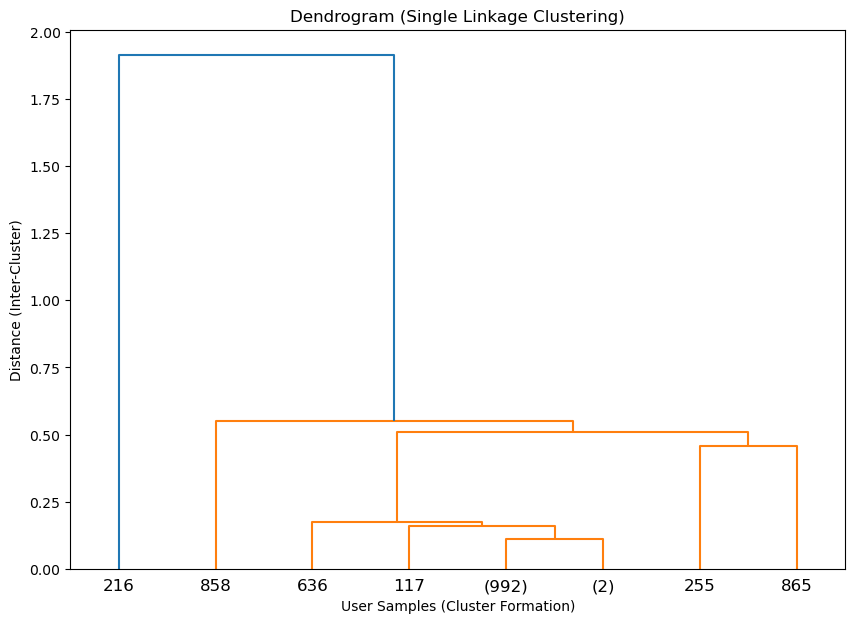

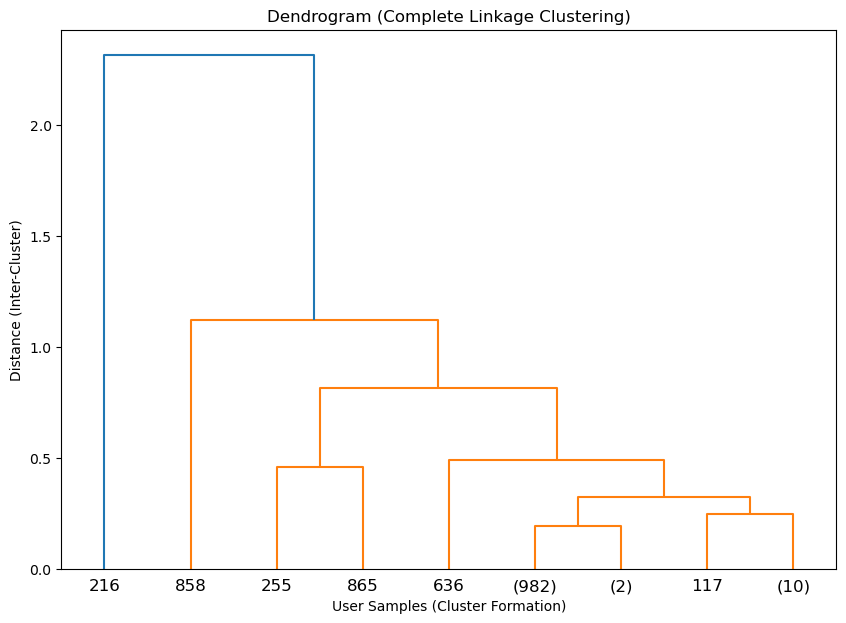

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Create dendrogram for single linkage
linked_single = linkage(X, method='single')
plt.figure(figsize=(10, 7))
dendrogram(linked_single, truncate_mode='level', p=5)
plt.title("Dendrogram (Single Linkage Clustering)")
plt.xlabel("User Samples (Cluster Formation)")
plt.ylabel("Distance (Inter-Cluster)")
plt.show()

# Create dendrogram for complete linkage
linked_complete = linkage(X, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked_complete, truncate_mode='level', p=5)
plt.title("Dendrogram (Complete Linkage Clustering)")
plt.xlabel("User Samples (Cluster Formation)")
plt.ylabel("Distance (Inter-Cluster)")
plt.show()


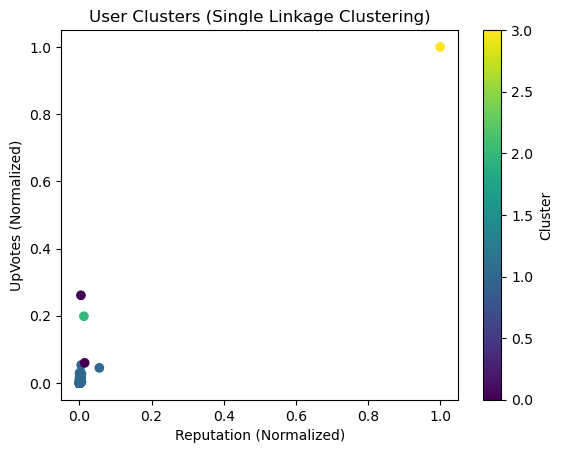

In [30]:
# Scatter plot for single linkage clustering
plt.scatter(X[:, 0], X[:, 1], c=clustering_single.labels_, cmap='viridis')
plt.title("User Clusters (Single Linkage Clustering)")
plt.xlabel("Reputation (Normalized)")
plt.ylabel("UpVotes (Normalized)")
plt.colorbar(label="Cluster")
plt.show()


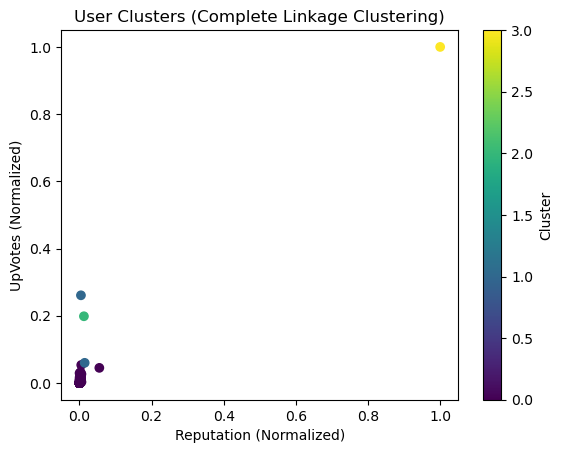

In [32]:
# Scatter plot for complete linkage clustering
plt.scatter(X[:, 0], X[:, 1], c=clustering_complete.labels_, cmap='viridis')
plt.title("User Clusters (Complete Linkage Clustering)")
plt.xlabel("Reputation (Normalized)")
plt.ylabel("UpVotes (Normalized)")
plt.colorbar(label="Cluster")
plt.show()


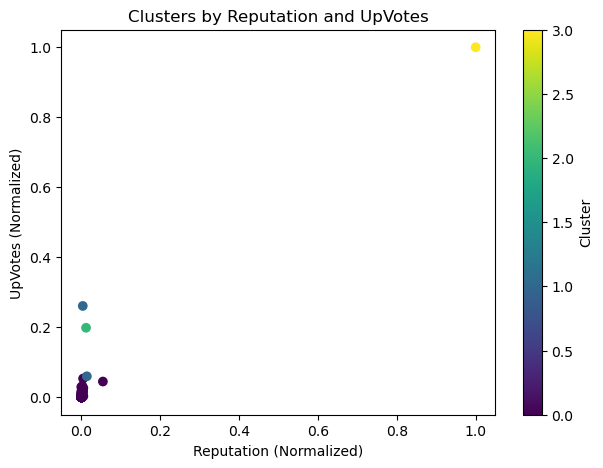

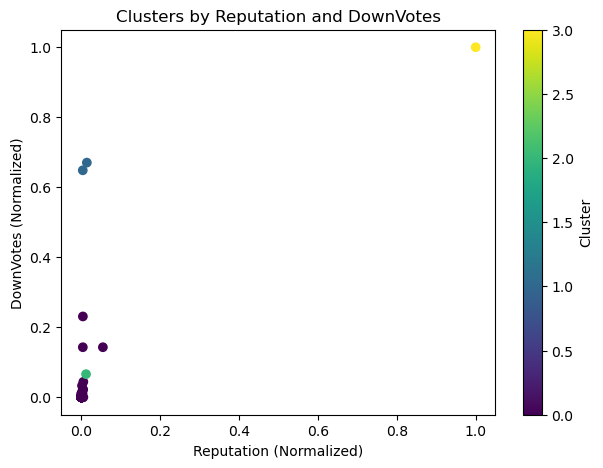

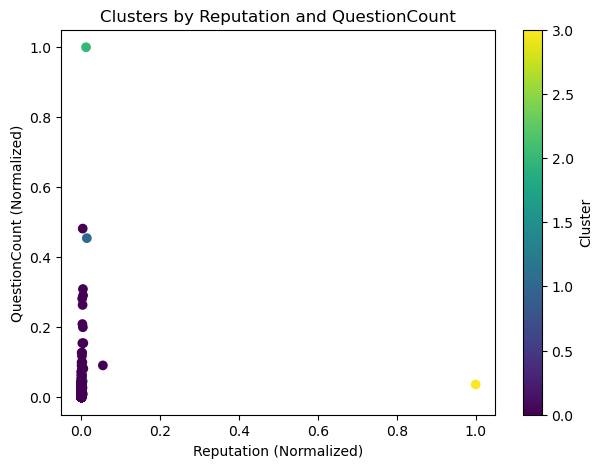

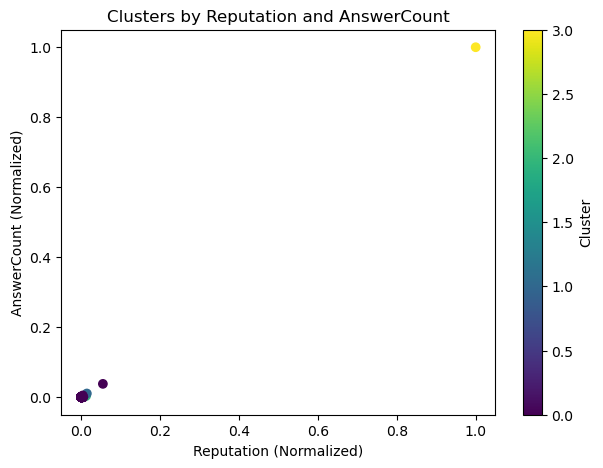

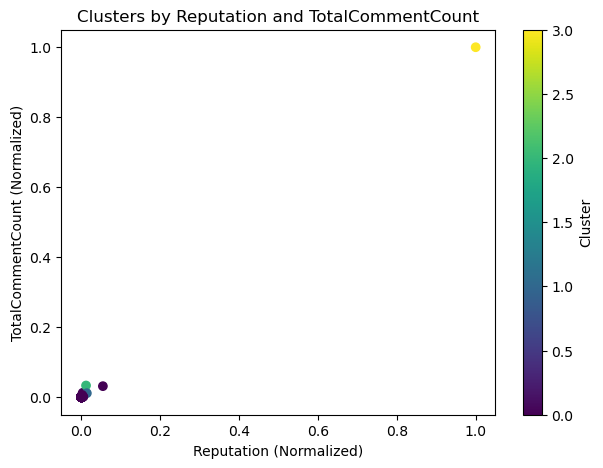

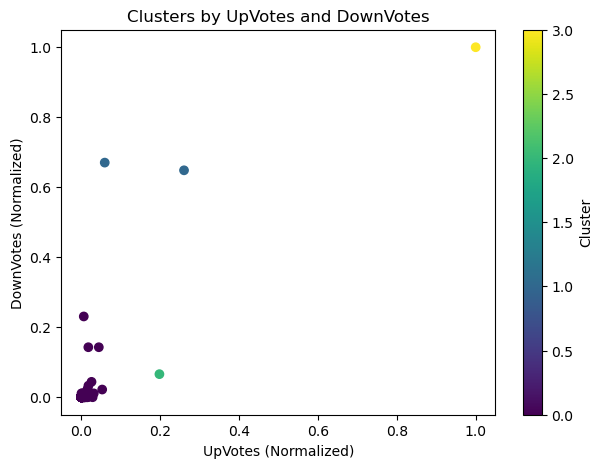

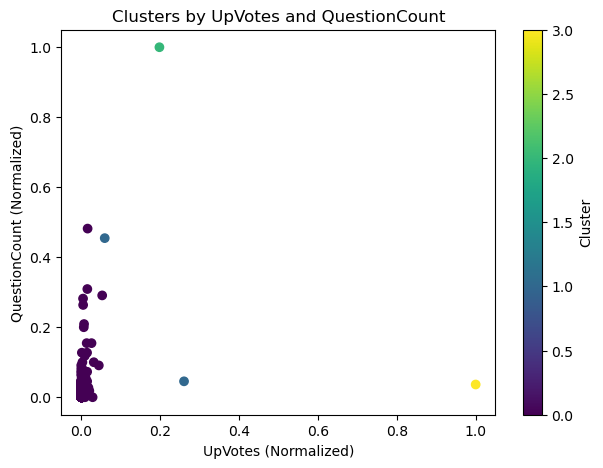

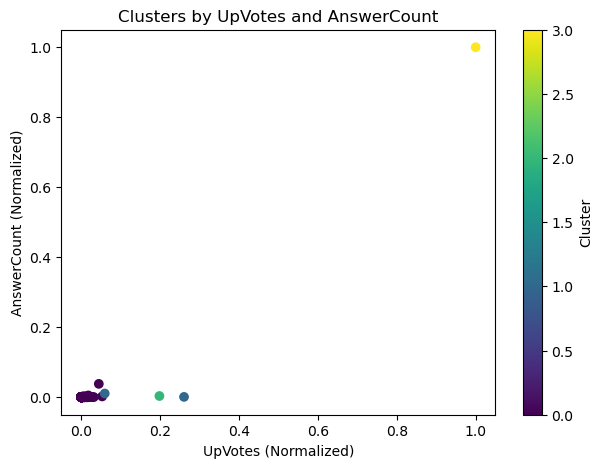

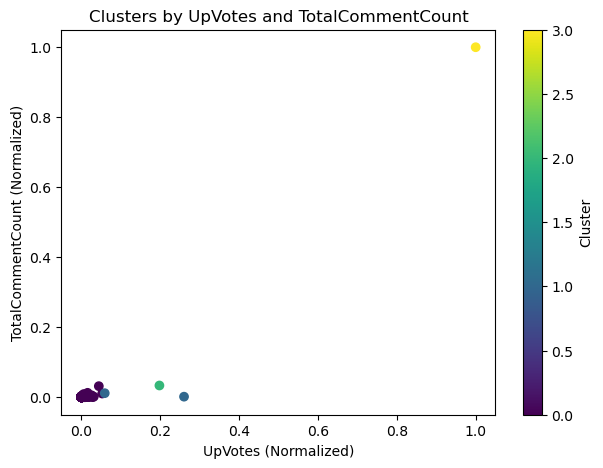

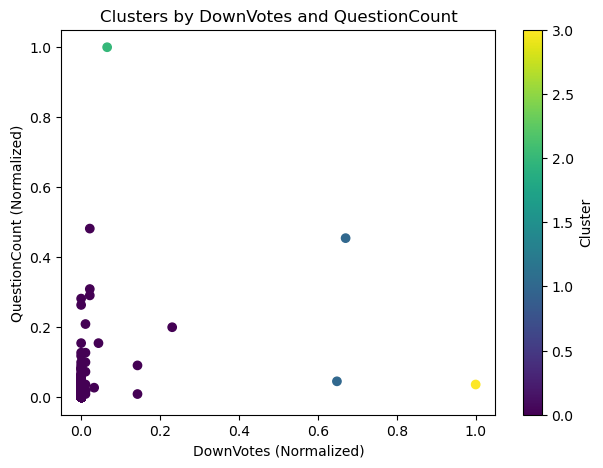

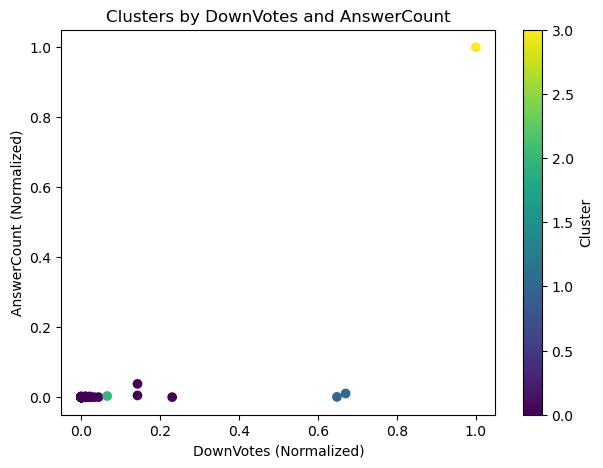

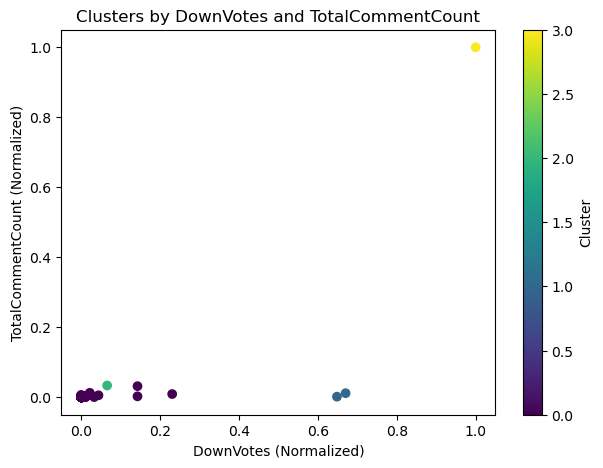

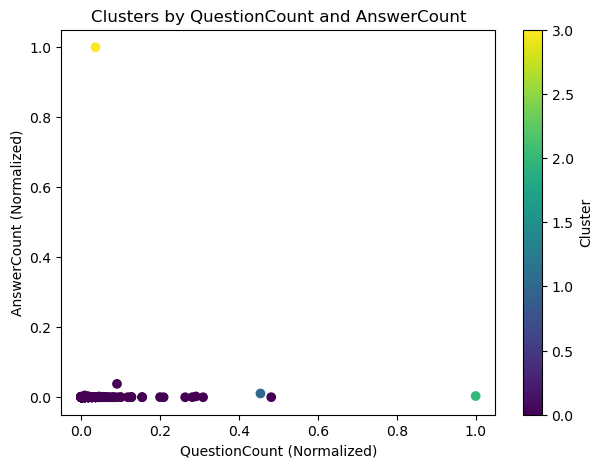

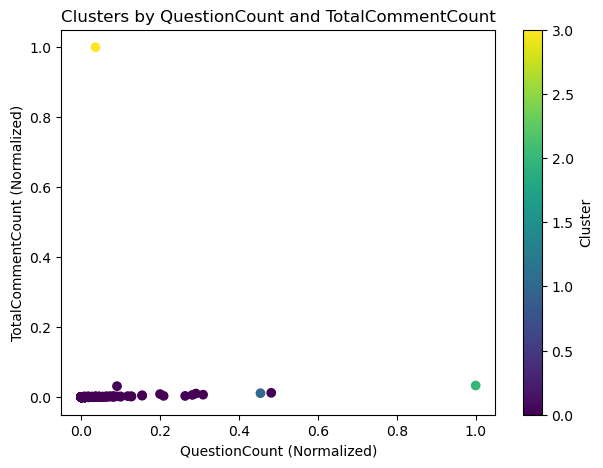

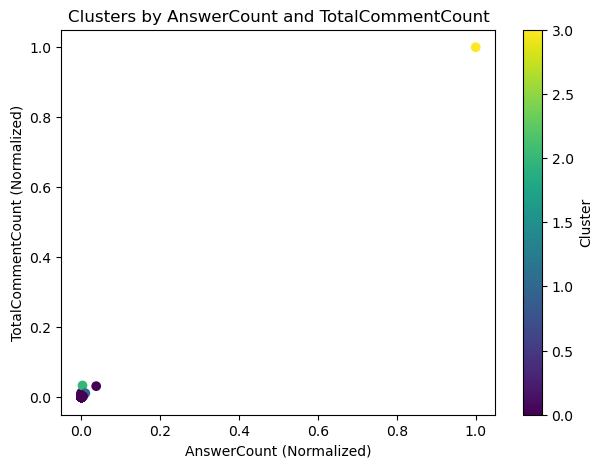

In [34]:
# Pairwise scatter plots for all features
from itertools import combinations

feature_names = normalized_features  # Replace with actual feature names if needed
n_clusters = 4  # Number of clusters

# Create scatter plots for all combinations of features
for feature_pair in combinations(range(len(feature_names)), 2):  # Generate all pairs of features
    plt.figure(figsize=(7, 5))
    plt.scatter(X[:, feature_pair[0]], X[:, feature_pair[1]], 
                c=clustering_complete.labels_, cmap='viridis')
    plt.title(f"Clusters by {feature_names[feature_pair[0]]} and {feature_names[feature_pair[1]]}")
    plt.xlabel(f"{feature_names[feature_pair[0]]} (Normalized)")
    plt.ylabel(f"{feature_names[feature_pair[1]]} (Normalized)")
    plt.colorbar(label="Cluster")
    plt.show()


In [40]:

# Analyze single linkage clusters
single_summary = data.groupby('Cluster_Single')[normalized_features].mean()

# Analyze complete linkage clusters
complete_summary = data.groupby('Cluster_Complete')[normalized_features].mean()

# Define the correct mapping for cluster IDs to archetypes based on the Complete Linkage summary
cluster_names_complete = {
    0: "Knowledge Seekers",    # Cluster 0: High QuestionCount, low UpVotes and AnswerCount
    1: "Engaged Commenters",   # Cluster 1: High TotalCommentCount, moderate UpVotes
    2: "Super Contributors",   # Cluster 2: High UpVotes, AnswerCount, and Reputation
    3: "Observers"             # Cluster 3: Low activity across all metrics
}

# Map cluster IDs to meaningful archetypes for Complete Linkage
data['Named_Cluster_Complete'] = data['Cluster_Complete'].map(cluster_names_complete)

# Display the final cluster summaries
print("Final Single Linkage Cluster Summary:")
print(single_summary)

print("\nFinal Complete Linkage Cluster Summary:")
print(complete_summary)

# Display the cluster mappings for verification
print("\nCluster Mapping (Complete Linkage):")
print(data[['Cluster_Complete', 'Named_Cluster_Complete']].drop_duplicates())


Index(['UserId', 'DisplayName', 'Reputation', 'CreationDate', 'LastAccessDate',
       'UpVotes', 'DownVotes', 'QuestionCount', 'AnswerCount',
       'TotalCommentCount', 'Cluster_Single', 'Cluster_Complete'],
      dtype='object')
Final Single Linkage Cluster Summary:
                Reputation   UpVotes  DownVotes  QuestionCount  AnswerCount  \
Cluster_Single                                                                
0                 0.009332  0.160314   0.659341       0.250000     0.005783   
1                 0.000251  0.000567   0.000750       0.007503     0.000072   
2                 0.012438  0.198429   0.065934       1.000000     0.003455   
3                 1.000000  1.000000   1.000000       0.036364     1.000000   

                TotalCommentCount  
Cluster_Single                     
0                        0.006550  
1                        0.000233  
2                        0.033531  
3                        1.000000  

Final Complete Linkage Cluster Summary

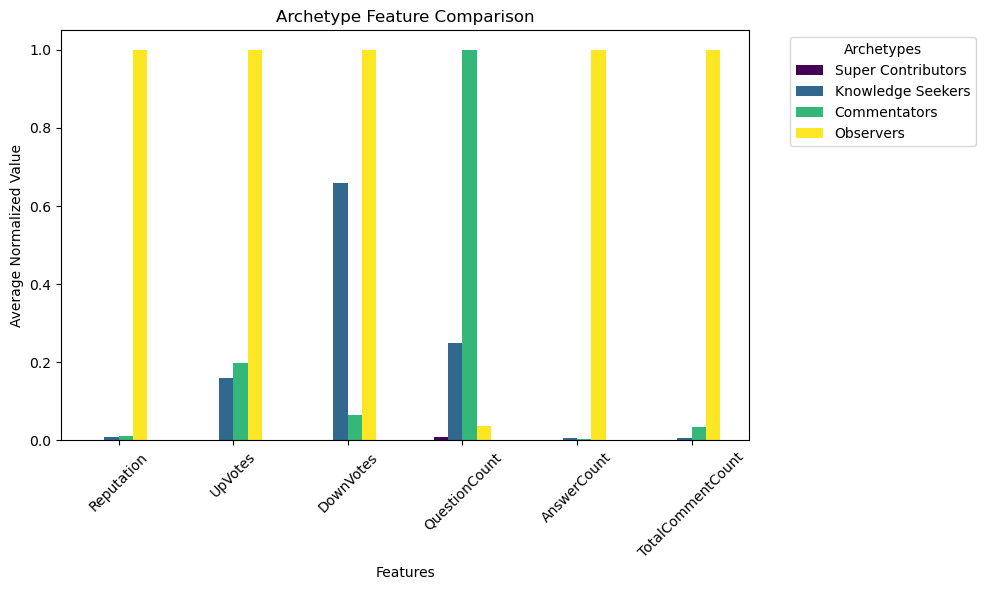

In [42]:
# Define archetype names for each cluster
archetype_names = {
    0: "Super Contributors",
    1: "Knowledge Seekers",
    2: "Commentators",
    3: "Observers"
}

# Map the cluster IDs to archetype names
cluster_labels = [archetype_names[i] for i in complete_summary.index]

# Plot the bar chart with archetype names
complete_summary.T.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title("Archetype Feature Comparison")
plt.xlabel("Features")
plt.ylabel("Average Normalized Value")
plt.legend(cluster_labels, title="Archetypes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
